In [ ]:
import sys
import os

os.chdir("../")

os.getcwd()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
#DR Methods
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
    #import umap
    #import pacmap
    #import trimap
#Clustering Methods
from sklearn.cluster import KMeans, DBSCAN, MeanShift, Birch, estimate_bandwidth
    #import HDBSCAN
from scipy.spatial.distance import pdist, squareform

Data Preprocessing

In [ ]:
#Load Data
df = pd.read_excel('C:\\Users\kterri3\Documents\Git Repositories\hw\CHE4230HW\che4230_hw\Project Stuff\RawData.xlsx')
# print(df)

In [ ]:
#Fill empty data with mean values
df.describe()
df.shape
df.isnull().sum().sum()
df_mean = df.fillna(df.mean(), inplace= True)
df.isnull().sum().sum()
df_drop_dup = df.drop_duplicates()
df.fillna(0)

In [ ]:
#df = df.drop(labels=[1])
#df.shape

In [ ]:
x_train, x_test = train_test_split(df, test_size = 0.2, random_state=42)
x_train2, x_val = train_test_split(x_train, test_size = 0.2, random_state=42)

print(len(x_train2))
print(len(x_test))
print(len(x_val))

In [ ]:
scaler = StandardScaler().fit(x_train2)
df_scaled = scaler.transform(x_train2)
df_scaled

In [ ]:
#def log_transform(x):
    #return np.log(x + 1)

#df_log = log_transform(df_scaled)
#df_log

Dimensionality Reduction

In [ ]:
#Using PCA
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_scaled)

In [ ]:
#Projecting the PCA result
plt.scatter(df_pca[:,1], df_pca[:,2])
plt.title("Principal Component Analysis")

Using PCA reduction with Clustering

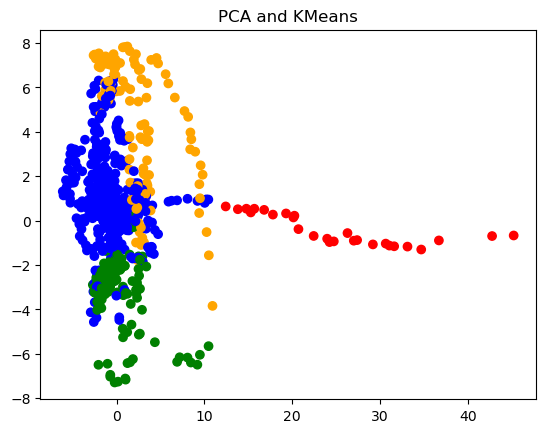

In [108]:
#PCA and KMEANS
kmean_model = KMeans(n_clusters = 4)
kmean_model.fit(df_pca)
kmean_labels = kmean_model.labels_
centroids = kmean_model.cluster_centers_

# colors for plotting
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
# assign a color to each features (note that we are using features as target)
#features_colors = [ colors[labels[i]] for i in range(len(df_pca)) ]
features_colors = [ colors[kmean_labels[i]] for i in range(len(df_pca)) ]

plt.scatter(df_pca[:,0], df_pca[:,1],c=features_colors,marker='o')
plt.title("PCA and KMeans")
plt.show()

In [ ]:
#PCA and MeanShift
#meanshift_model = MeanShift(bandwidth=0.1)
#meanshift_model.fit(df_pca)
#labels = meanshift_model.labels_
#centroids = meanshift_model.cluster_centers_

# colors for plotting
#colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
# assign a color to each features (note that we are using features as target)
#features_colors = [ colors[labels[i]] for i in range(len(df_pca)) ]
#features_colors = [ colors[labels[i]] for i in range(len(df_pca)) ]

#plt.scatter(df_pca[:,0], df_pca[:,1],c=features_colors,marker='o')
#plt.title("PCA and MeanShift")
#plt.show()

In [ ]:
#PCA and DBScan
#dbscan_model = DBSCAN(eps=1, min_samples=3)
#dbscan_model.fit(df_pca)
#dbscan_labels = dbscan_model.labels_


# colors for plotting
#colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','yellow','purple','navy','lime','cyan','maroon','silver']
# assign a color to each features (note that we are using features as target)
#features_colors = [ colors[dbscan_labels[i]] for i in range(len(df_pca)) ]

#plt.scatter(df_pca[:,0], df_pca[:,1],c=features_colors,marker='o')
#plt.title("PCA and DBScan")
#plt.show()

Other DR Methods

c:\Users\kterri3\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\kterri3\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


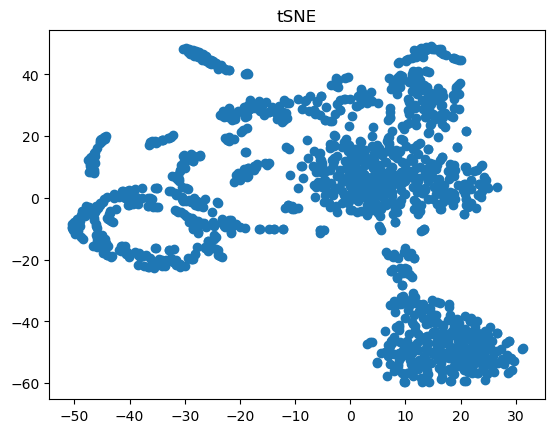

In [106]:
#using tSNE
tsne = TSNE(n_components = 2)
df_tsne = tsne.fit_transform(df_scaled)

plt.scatter(df_tsne[:,0], df_tsne[:,1])
plt.title("tSNE")
plt.show()

In [ ]:
#using UMAP
#reducer = umap.UMAP()
#data_UMAP = reducer.fit_transform(df_scaled)

In [ ]:
#using PACMAP

In [ ]:
#using TRIMAP

In [ ]:
#using Spectral Embedding

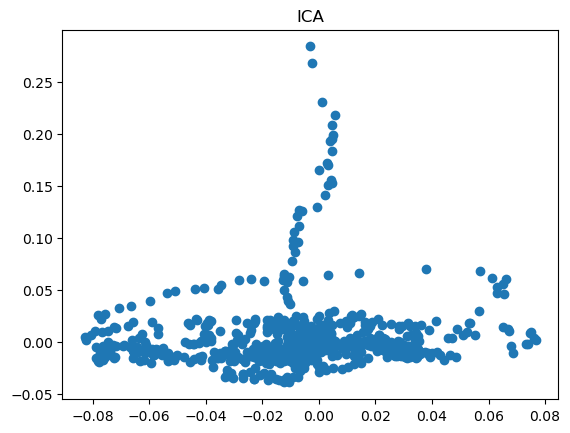

In [107]:
#using ICA
ica = FastICA(n_components = 2)
df_ica = ica.fit_transform(df_scaled)

plt.scatter(df_ica[:,0], df_ica[:,1])
plt.title("ICA")
plt.show()